In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r"Data\iris.csv")
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [5]:
len(df)

150

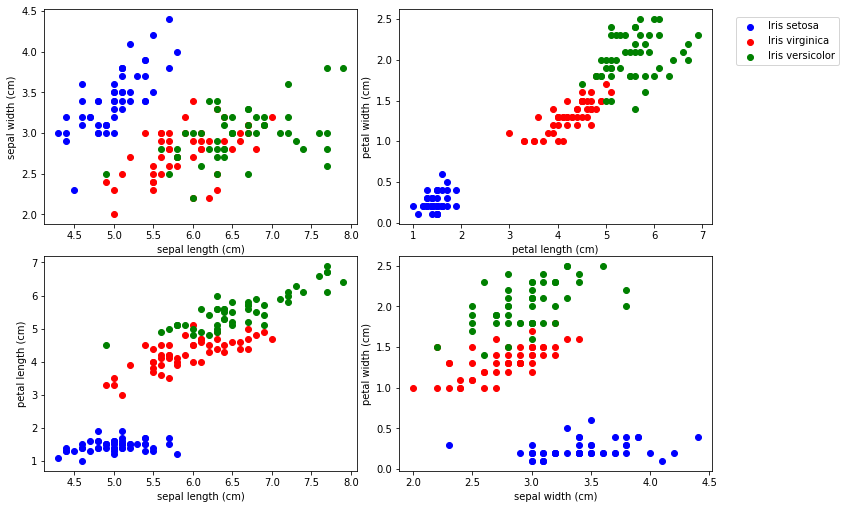

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [7]:
class Model(nn.Module):
    def __init__(self, in_features, h1, h2, out_features):
        super().__init__()
        self.Linear1 = nn.Linear(in_features, h1)
        self.Linear2 = nn.Linear(h1, h2)
        self.Linear3 = nn.Linear(h2, out_features)

    def forward(self, x):
        x = F.relu(self.Linear1(x))
        x = F.relu(self.Linear2(x))
        x = self.Linear3(x)
        return x     

In [9]:
torch.manual_seed(32)
model = Model(4, 8, 9, 3)

In [13]:
X = df.drop('target', axis=1).values

In [18]:
y = df['target'].values

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [35]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [29]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [30]:
epochs = 100
losses = []
for i in range(epochs):
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    print(f"epoch: {i + 1:2}, loss: {loss.item():10.8f}")

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  1, loss: 1.15071154
epoch:  2, loss: 1.11666143
epoch:  3, loss: 1.08740425
epoch:  4, loss: 1.06418836
epoch:  5, loss: 1.04322541
epoch:  6, loss: 1.02363551
epoch:  7, loss: 1.00516391
epoch:  8, loss: 0.98896617
epoch:  9, loss: 0.97385150
epoch: 10, loss: 0.95661831
epoch: 11, loss: 0.93773156
epoch: 12, loss: 0.91846561
epoch: 13, loss: 0.90035421
epoch: 14, loss: 0.88448417
epoch: 15, loss: 0.87061608
epoch: 16, loss: 0.85550755
epoch: 17, loss: 0.83894199
epoch: 18, loss: 0.82219994
epoch: 19, loss: 0.80639350
epoch: 20, loss: 0.79237300
epoch: 21, loss: 0.77982575
epoch: 22, loss: 0.76790619
epoch: 23, loss: 0.75586647
epoch: 24, loss: 0.74297965
epoch: 25, loss: 0.72793740
epoch: 26, loss: 0.71124804
epoch: 27, loss: 0.69410664
epoch: 28, loss: 0.67597127
epoch: 29, loss: 0.65660751
epoch: 30, loss: 0.63202900
epoch: 31, loss: 0.60994011
epoch: 32, loss: 0.58970833
epoch: 33, loss: 0.56900311
epoch: 34, loss: 0.54688853
epoch: 35, loss: 0.52373332
epoch: 36, loss: 0.5

Text(0.5, 0, 'Epoch')

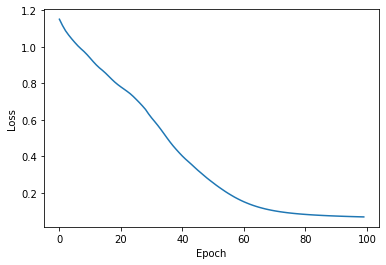

In [31]:
plt.plot(losses)
plt.ylabel("Loss")
plt.xlabel("Epoch")

In [36]:
with torch.no_grad():
    y_pred = model.forward(X_test)
    loss = criterion(y_pred, y_test)

In [37]:
loss

tensor(0.0581)

In [38]:
torch.save(model.state_dict(), 'IrisModel.pt')

In [40]:
new_model = Model(4, 8,9,3)
new_model.load_state_dict(torch.load('IrisModel.pt'))
new_model.eval()

Model(
  (Linear1): Linear(in_features=4, out_features=8, bias=True)
  (Linear2): Linear(in_features=8, out_features=9, bias=True)
  (Linear3): Linear(in_features=9, out_features=3, bias=True)
)

In [41]:
with torch.no_grad():
    y_pred = new_model.forward(X_test)
    loss = criterion(y_pred, y_test)

In [43]:
loss

tensor(0.0581)

In [44]:
from torchvision import datasets, transforms

In [46]:
transform = transforms.ToTensor()

In [48]:
train_data = datasets.MNIST(root=r'\Data', train=True, download=True, transform=transform)

In [49]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: \Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [50]:
test_data = datasets.MNIST(root=r'\Data', train=False, download=True, transform=transform)

In [51]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: \Data
    Split: Test
    StandardTransform
Transform: ToTensor()

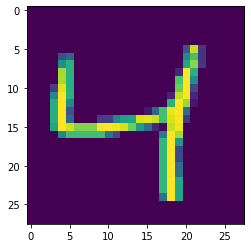

In [64]:
plt.imshow(train_data[2][0].reshape((28, 28)))

In [78]:
train_data[2][0].size()

torch.Size([1, 28, 28])

In [65]:
train_data[2][1]

4

In [66]:
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

In [74]:
test_loader = DataLoader(train_data, batch_size=500, shuffle=False)

In [83]:
class Model(nn.Module):
    def __init__(self, in_size=28*28, h1=120, h2=84, out_size=10):
        super().__init__()
        self.linear1 = nn.Linear(in_size, h1)
        self.linear2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_size)
        
    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.out(x)
        x = F.log_softmax(x, dim=1)
        return x

In [119]:
torch.manual_seed(101)
model = Model()
model

Model(
  (linear1): Linear(in_features=784, out_features=120, bias=True)
  (linear2): Linear(in_features=120, out_features=84, bias=True)
  (out): Linear(in_features=84, out_features=10, bias=True)
)

In [120]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [121]:
# a[0] -> # Batch at index 0
# a[0][0] -> # all the images of batch 0
# a[0][1] -> # all the labels of batch 0
# a[0][0][4] -> 5th image at batch 0
# a[0][1][4] -> 5th label at batch 0

In [122]:
a[0][0].size()

torch.Size([100, 1, 28, 28])

In [123]:
epochs = 20

train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_correct = 0
    tst_correct = 0
    
    print(f"epoch = {i}")
    
    for b, (X_train, y_train) in enumerate(train_loader):
        y_pred = model.forward(X_train.view(100, 784))
        loss = criterion(y_pred, y_train)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

epoch = 0
epoch = 1
epoch = 2
epoch = 3
epoch = 4
epoch = 5
epoch = 6
epoch = 7
epoch = 8
epoch = 9
epoch = 10
epoch = 11
epoch = 12
epoch = 13
epoch = 14
epoch = 15
epoch = 16
epoch = 17
epoch = 18
epoch = 19


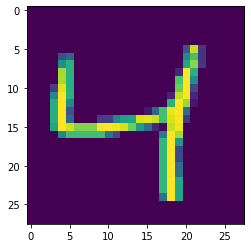

In [124]:
plt.imshow(train_data[2][0].reshape((28, 28)))

In [125]:
four = torch.tensor(train_data[2][0]).view(1, 784)

C:\Users\Salar Shahryari\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


In [127]:
four.size()

torch.Size([1, 784])

In [133]:
torch.argmax(model.forward(four))

tensor(4)

In [147]:
two = plt.imread('2.jpg')

In [148]:
two.shape

(28, 28, 3)

In [149]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

In [150]:
two_ = rgb2gray(two)

In [151]:
two_ = torch.FloatTensor(two_).view(1, 784)

In [152]:
torch.argmax(model.forward(two_))

tensor(3)

In [153]:
two_

tensor([[262.6500, 262.6500, 262.6500, 262.6500, 262.6500, 262.6500, 262.6500,
         262.6500, 261.6200, 262.6500, 261.6200, 262.6500, 262.6500, 262.6500,
         262.6500, 262.6500, 262.6500, 262.6500, 262.6500, 262.6500, 262.6500,
         262.6500, 262.6500, 261.6200, 262.6500, 262.6500, 262.6500, 262.6500,
         262.6500, 262.6500, 262.6500, 262.6500, 262.6500, 262.6500, 262.6500,
         262.6500, 262.6500, 261.6200, 262.6500, 261.6200, 262.6500, 262.6500,
         262.6500, 262.6500, 262.6500, 262.6500, 262.6500, 262.6500, 261.6200,
         262.6500, 262.6500, 262.6500, 262.6500, 262.6500, 262.6500, 262.6500,
         262.6500, 262.6500, 262.6500, 262.6500, 262.6500, 262.6500, 262.6500,
         262.6500, 262.6500, 261.6200, 262.6500, 262.6500, 262.6500, 262.6500,
         261.6200, 262.6500, 262.6500, 262.6500, 262.6500, 262.6500, 262.6500,
         260.5900, 262.6500, 261.6200, 262.6500, 262.6500, 262.6500, 262.6500,
         262.6500, 262.6500, 262.6500, 262.6500, 262

In [154]:
four

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [155]:
for X_test, y_test in test_loader:
    y_val = model.forward(X_test.view(500, -1))

In [156]:
y_val.size()

torch.Size([500, 10])

In [171]:
torch.argmax(y_val[2])

tensor(5)

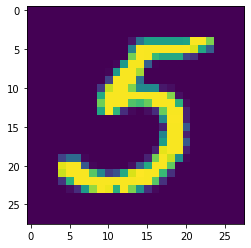

In [170]:
plt.imshow(X_test[2][0].view(28, 28))